In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_csv('data/FF/R13296609_SL140.csv')

In [3]:
df.shape

(6, 88)

In [4]:
df.head

<bound method NDFrame.head of      Geo_FIPS           Geo_GEOID              Geo_NAME  \
0  6037192001  14000US06037192001  Census Tract 1920.01   
1  6037192002  14000US06037192002  Census Tract 1920.02   
2  6037194401  14000US06037194401  Census Tract 1944.01   
3  6037214000  14000US06037214000     Census Tract 2140   
4  6037214400  14000US06037214400     Census Tract 2144   
5  6037214501  14000US06037214501  Census Tract 2145.01   

                                           Geo_QName Geo_STUSAB  Geo_SUMLEV  \
0  Census Tract 1920.01, Los Angeles County, Cali...         ca         140   
1  Census Tract 1920.02, Los Angeles County, Cali...         ca         140   
2  Census Tract 1944.01, Los Angeles County, Cali...         ca         140   
3  Census Tract 2140, Los Angeles County, California         ca         140   
4  Census Tract 2144, Los Angeles County, California         ca         140   
5  Census Tract 2145.01, Los Angeles County, Cali...         ca         140   

  

In [5]:
df.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
1,6037192002,14000US06037192002,Census Tract 1920.02,"Census Tract 1920.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4317,NaN,...,5.23,2.49,1.85,1.85,5.14,9.97,9.89,7.4,17.28,21.14


In [6]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           6 non-null      int64  
 1   Geo_GEOID          6 non-null      object 
 2   Geo_NAME           6 non-null      object 
 3   Geo_QName          6 non-null      object 
 4   Geo_STUSAB         6 non-null      object 
 5   Geo_SUMLEV         6 non-null      int64  
 6   Geo_GEOCOMP        6 non-null      int64  
 7   Geo_FILEID         6 non-null      object 
 8   Geo_LOGRECNO       6 non-null      int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          6 non-null      int64  
 14  Geo_COUNTY         6 non-null      int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non-null 

In [7]:
df.Geo_FIPS.head()

0    6037192001
1    6037192002
2    6037194401
3    6037214000
4    6037214400
Name: Geo_FIPS, dtype: int64

In [8]:
# Have to conver the FIPS code into strings
df = pd.read_csv(
    'data/FF/R13296609_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [9]:
df.Geo_FIPS.head()

0    06037192001
1    06037192002
2    06037194401
3    06037214000
4    06037214400
Name: Geo_FIPS, dtype: object

In [10]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [11]:
df=df.dropna(axis=1,how="all")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           6 non-null      object 
 1   Geo_GEOID          6 non-null      object 
 2   Geo_NAME           6 non-null      object 
 3   Geo_QName          6 non-null      object 
 4   Geo_STUSAB         6 non-null      object 
 5   Geo_SUMLEV         6 non-null      int64  
 6   Geo_GEOCOMP        6 non-null      int64  
 7   Geo_FILEID         6 non-null      object 
 8   Geo_LOGRECNO       6 non-null      int64  
 9   Geo_STATE          6 non-null      object 
 10  Geo_COUNTY         6 non-null      object 
 11  Geo_TRACT          6 non-null      int64  
 12  SE_A14001_001      6 non-null      int64  
 13  SE_A14001_002      6 non-null      int64  
 14  SE_A14001_003      6 non-null      int64  
 15  SE_A14001_004      6 non-null      int64  
 16  SE_A14001_005      6 non-null 

In [13]:
df.columns 

Index(['Geo_FIPS', 'Geo_GEOID', 'Geo_NAME', 'Geo_QName', 'Geo_STUSAB',
       'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_FILEID', 'Geo_LOGRECNO', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_TRACT', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [14]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                  ]

In [15]:
df2 = df[columns_to_keep]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       6 non-null      object
 1   SE_A14001_002  6 non-null      int64 
 2   SE_A14001_003  6 non-null      int64 
 3   SE_A14001_004  6 non-null      int64 
 4   SE_A14001_005  6 non-null      int64 
 5   SE_A14001_006  6 non-null      int64 
 6   SE_A14001_007  6 non-null      int64 
 7   SE_A14001_008  6 non-null      int64 
 8   SE_A14001_009  6 non-null      int64 
 9   SE_A14001_010  6 non-null      int64 
 10  SE_A14001_011  6 non-null      int64 
 11  SE_A14001_012  6 non-null      int64 
 12  SE_A14001_013  6 non-null      int64 
 13  SE_A14001_014  6 non-null      int64 
 14  SE_A14001_015  6 non-null      int64 
 15  SE_A14001_016  6 non-null      int64 
 16  SE_A14001_017  6 non-null      int64 
dtypes: int64(16), object(1)
memory usage: 944.0+ bytes


In [16]:
# Rename the columns 
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [17]:
# Making sure the data works 
df2.head(10)

,Geo_FIPS,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
0,06037192001,51,68,61,8,32,91,25,48,32,73,90,193,39,79,46,213
1,06037192002,78,12,49,16,17,49,65,31,23,23,64,124,123,92,215,263
2,06037194401,34,52,19,11,66,48,17,81,21,51,103,213,161,89,105,163
3,06037214000,51,0,21,62,11,54,11,22,50,73,64,146,126,84,209,380
4,06037214400,92,51,12,122,8,19,65,24,9,122,236,292,121,77,208,209
5,06037214501,92,26,39,66,7,16,16,14,58,122,129,189,176,55,146,253


In [18]:
df2.columns = ['FIPS',               
'Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [19]:
# Doing some stats 
df2.mean()

FIPS                  1.006199e+64
Less than $10,000     6.633333e+01
$10,000-$14,999       3.483333e+01
$15,000-$19,999       3.350000e+01
$20,000-$24,999       4.750000e+01
$25,000-$29,999       2.350000e+01
$30,000-$34,999       4.616667e+01
$35,000-$39,999       3.316667e+01
$40,000-$44,999       3.666667e+01
$45,000-$49,999       3.216667e+01
$50,000-$59,999       7.733333e+01
$60,000-$74,999       1.143333e+02
$75,000-$99,999       1.928333e+02
$100,000-$124,999     1.243333e+02
$125,000-$149,999     7.933333e+01
$150,000-$199,999     1.548333e+02
More than $200,000    2.468333e+02
dtype: float64

In [20]:
# access a single column like df['col_name']
df2.head()

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037192001,51,68,61,8,32,91,25,48,32,73,90,193,39,79,46,213
1,06037192002,78,12,49,16,17,49,65,31,23,23,64,124,123,92,215,263
2,06037194401,34,52,19,11,66,48,17,81,21,51,103,213,161,89,105,163
3,06037214000,51,0,21,62,11,54,11,22,50,73,64,146,126,84,209,380
4,06037214400,92,51,12,122,8,19,65,24,9,122,236,292,121,77,208,209


In [21]:
df2['Less than $10,000'].mean()

66.33333333333333

In [22]:
df2.describe()

,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
count,6.000000,6.000000,6.000000,6.0000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,66.333333,34.833333,33.500000,47.5000,23.500000,46.166667,33.166667,36.666667,32.166667,77.333333,114.333333,192.833333,124.333333,79.333333,154.833333,246.833333
std,24.369380,26.339451,19.263956,44.6934,22.757416,27.316051,25.063253,24.557416,18.605555,39.174822,64.506330,58.629060,47.563291,13.216152,68.973666,74.346262
min,34.000000,0.000000,12.000000,8.0000,7.000000,16.000000,11.000000,14.000000,9.000000,23.000000,64.000000,124.000000,39.000000,55.000000,46.000000,163.000000
25%,51.000000,15.500000,19.500000,12.2500,8.750000,26.250000,16.250000,22.500000,21.500000,56.500000,70.500000,156.750000,121.500000,77.500000,115.250000,210.000000
50%,64.500000,38.500000,30.000000,39.0000,14.000000,48.500000,21.000000,27.500000,27.500000,73.000000,96.500000,191.000000,124.500000,81.500000,177.000000,233.000000
75%,88.500000,51.750000,46.500000,65.0000,28.250000,52.750000,55.000000,43.750000,45.500000,109.750000,122.500000,208.000000,152.250000,87.750000,208.750000,260.500000
max,92.000000,68.000000,61.000000,122.0000,66.000000,91.000000,65.000000,81.000000,58.000000,122.000000,236.000000,292.000000,176.000000,92.000000,215.000000,380.000000


<AxesSubplot: title={'center': 'Fair Flex'}>

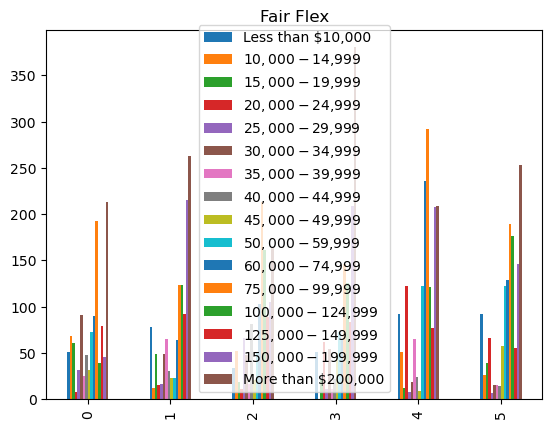

In [23]:
df2.plot.bar(title = "Fair Flex")

In [24]:
# Want to create a total households population
df3 = ['Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [25]:
df2['TotalPop'] = df2[df3].sum(axis = 1)
df2.head(3)

/tmp/ipykernel_88/337586398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalPop'] = df2[df3].sum(axis = 1)


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop
0,06037192001,51,68,61,8,32,91,25,48,32,73,90,193,39,79,46,213,1149
1,06037192002,78,12,49,16,17,49,65,31,23,23,64,124,123,92,215,263,1244
2,06037194401,34,52,19,11,66,48,17,81,21,51,103,213,161,89,105,163,1234


In [26]:
# Notice that the SE_A14001_001 is household number of resondents by census tract
df3 = pd.read_csv("data/FF/R13296609_SL140.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3.head(5)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,6037192001,14000US06037192001,Census Tract 1920.01,"Census Tract 1920.01, Los Angeles County, Cali...",ca,140,0,ACSSF,4316,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,192001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1149,51,68,61,8,32,91,25,48,32,73,90,193,39,79,46,213,4.44,5.92,5.31,0.70,2.79,7.92,2.18,4.18,2.79,6.35,7.83,16.80,3.39,6.88,4.00,18.54
1,6037192002,14000US06037192002,Census Tract 1920.02,"Census Tract 1920.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4317,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,192002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244,78,12,49,16,17,49,65,31,23,23,64,124,123,92,215,263,6.27,0.96,3.94,1.29,1.37,3.94,5.23,2.49,1.85,1.85,5.14,9.97,9.89,7.40,17.28,21.14
2,6037194401,14000US06037194401,Census Tract 1944.01,"Census Tract 1944.01, Los Angeles County, Cali...",ca,140,0,ACSSF,4330,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,194401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1234,34,52,19,11,66,48,17,81,21,51,103,213,161,89,105,163,2.76,4.21,1.54,0.89,5.35,3.89,1.38,6.56,1.70,4.13,8.35,17.26,13.05,7.21,8.51,13.21
3,6037214000,14000US06037214000,Census Tract 2140,"Census Tract 2140, Los Angeles County, California",ca,140,0,ACSSF,4493,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,214000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1364,51,0,21,62,11,54,11,22,50,73,64,146,126,84,209,380,3.74,0.00,1.54,4.55,0.81,3.96,0.81,1.61,3.67,5.35,4.69,10.70,9.24,6.16,15.32,27.86
4,6037214400,14000US06037214400,Census Tract 2144,"Census Tract 2144, Los Angeles County, California",ca,140,0,ACSSF,4495,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,214400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1667,92,51,12,122,8,19,65,24,9,122,236,292,121,77,208,209,5.52,3.06,0.72,7.32,0.48,1.14,3.90,1.44,0.54,7.32,14.16,17.52,7.26,4.62,12.48,12.54


In [27]:
df_householdsize = df3['SE_A14001_001']
df_householdsize.sample(6)

4    1667
3    1364
2    1234
1    1244
5    1404
0    1149
Name: SE_A14001_001, dtype: int64

In [28]:
df_householdsize.describe()

count       6.000000
mean     1343.666667
std       183.550175
min      1149.000000
25%      1236.500000
50%      1304.000000
75%      1394.000000
max      1667.000000
Name: SE_A14001_001, dtype: float64

In [29]:
# Creating a poverty column variable 
df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] 
df2.sample(5)

/tmp/ipykernel_88/3305094393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999']


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty
3,06037214000,51,0,21,62,11,54,11,22,50,73,64,146,126,84,209,380,1364,134
0,06037192001,51,68,61,8,32,91,25,48,32,73,90,193,39,79,46,213,1149,188
2,06037194401,34,52,19,11,66,48,17,81,21,51,103,213,161,89,105,163,1234,116
4,06037214400,92,51,12,122,8,19,65,24,9,122,236,292,121,77,208,209,1667,277
1,06037192002,78,12,49,16,17,49,65,31,23,23,64,124,123,92,215,263,1244,155


In [30]:
#Creating a poverty and total population to get a percent 
df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100
df2.sample(6)

/tmp/ipykernel_88/992450908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
4,06037214400,92,51,12,122,8,19,65,24,9,122,236,292,121,77,208,209,1667,277,16.616677
5,06037214501,92,26,39,66,7,16,16,14,58,122,129,189,176,55,146,253,1404,223,15.883191
0,06037192001,51,68,61,8,32,91,25,48,32,73,90,193,39,79,46,213,1149,188,16.362054
1,06037192002,78,12,49,16,17,49,65,31,23,23,64,124,123,92,215,263,1244,155,12.459807
2,06037194401,34,52,19,11,66,48,17,81,21,51,103,213,161,89,105,163,1234,116,9.400324
3,06037214000,51,0,21,62,11,54,11,22,50,73,64,146,126,84,209,380,1364,134,9.824047


<AxesSubplot: ylabel='Frequency'>

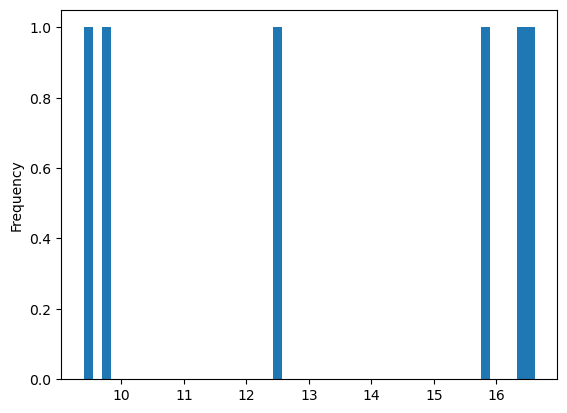

In [31]:
df2['p_poverty'].plot.hist(bins=50)

In [32]:
# top 10 census of households income that live in poverty. 
df_sorted = df2.sort_values(by='p_poverty',ascending = False)
df_sorted[['FIPS','p_poverty']].head(10)

,FIPS,p_poverty
4,06037214400,16.616677
0,06037192001,16.362054
5,06037214501,15.883191
1,06037192002,12.459807
3,06037214000,9.824047
2,06037194401,9.400324


<AxesSubplot: xlabel='FIPS'>

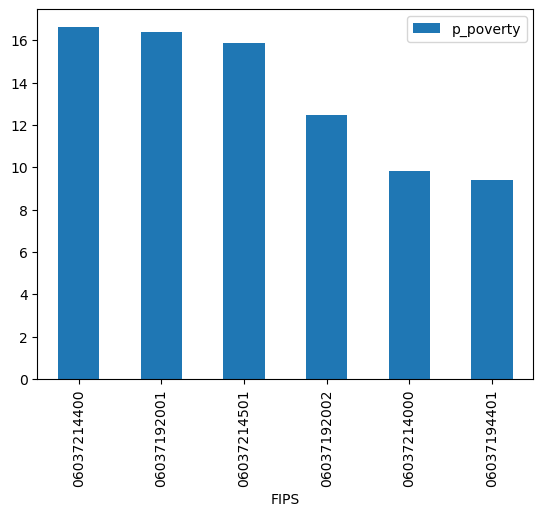

In [33]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='p_poverty')

<AxesSubplot: title={'center': 'Census Tract where FairFax has more poverty'}, ylabel='FIPS'>

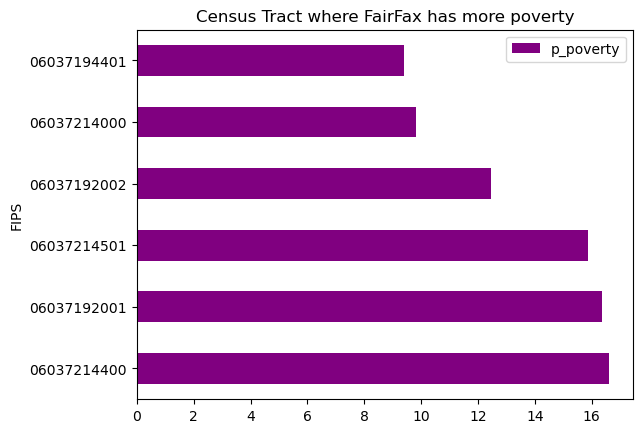

In [37]:
df_sorted.head(30).plot.barh(x='FIPS',  # barh turns the plot direction 
                            y='p_poverty', 
                            title='Census Tract where FairFax has more poverty',
                            color='Purple')

In [35]:
# Import geojson file of LA County
tracts=gpd.read_file('data/FF/Census_Tracts_2020.geojson')
tracts.head(2)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."


In [40]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [41]:
tracts=tracts.merge(df2, on="FIPS")

In [42]:
tracts.head(3)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
0,492,192001,1920.01,5.713105e+06,11592.717776,"POLYGON ((-118.34744 34.08026, -118.34623 34.0...",06037192001,51,68,61,8,32,91,25,48,32,73,90,193,39,79,46,213,1149,188,16.362054
1,493,192002,1920.02,9.238710e+06,12815.356277,"POLYGON ((-118.36040 34.08020, -118.36001 34.0...",06037192002,78,12,49,16,17,49,65,31,23,23,64,124,123,92,215,263,1244,155,12.459807
2,506,194401,1944.01,5.013242e+06,9747.518611,"POLYGON ((-118.36328 34.08898, -118.36380 34.0...",06037194401,34,52,19,11,66,48,17,81,21,51,103,213,161,89,105,163,1234,116,9.400324


<AxesSubplot: >

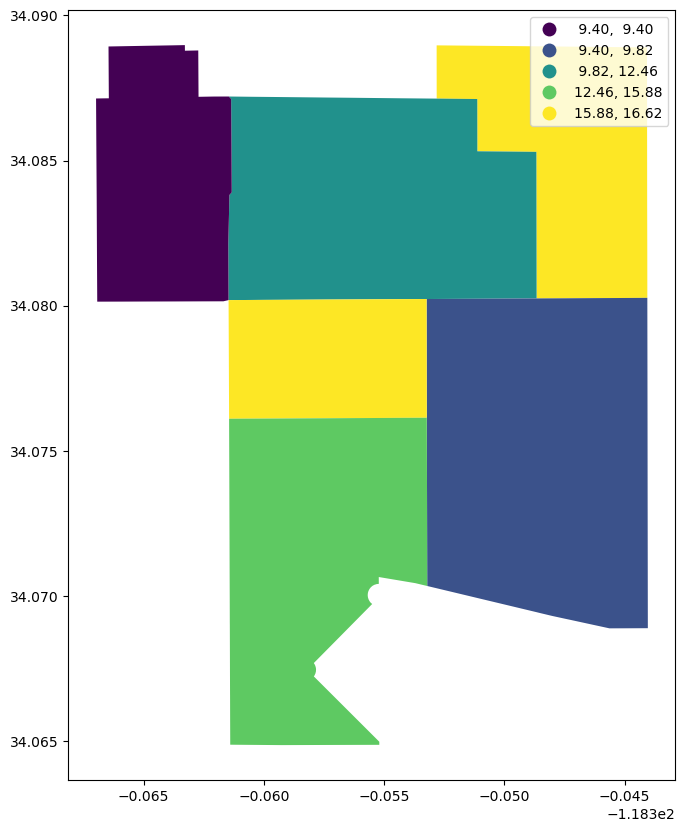

In [43]:
# scheme='NaturalBreaks'
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='NaturalBreaks')